## Playground notebook to visualize stars in the celestial sphere

In [3]:
# Set root folder context
import os
import sys
from pathlib import Path
if not hasattr(sys,"_project_root_initialized"):
    PROJECT_ROOT = Path.cwd().parent
    sys.path.insert(0, str(PROJECT_ROOT))
    os.chdir(PROJECT_ROOT)
    sys._project_root_initialized = True

In [4]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
from src.data_processing import load_exoplanet_data

In [28]:
planets=load_exoplanet_data()
planets=planets[planets['sy_dist']<5000]

## Galactic Coordinates

### In all visualizations, we see 2 directed beams as a result of different survey methods.
- The incredibly dense "cone" of systems is recorded by Kepler. This space telescope observes a roughly 115 square degree patch in the direction of the Cygnus and Lyra constellations. This direction is chosen for multiple reasons such as the high density of stars, the fact that it is out of the ecliptic plane and since it allows for observations of stars roughly the same distance from the galactic center as the Sun.

- The long narrow line is a result of microlensing surveys such as MOA, OGLE, KMTNet (and Hubble when used for microlensing follow-ups). When a distant star is sufficiently aligned with a massive foreground object, the bending of light allows for the observation of distant objects that emit little or no light. This phenomenon is known as microlensing. To maximize the probability of these alignments, a high stellar density is required, and the densest stellar field visible from Eart is towards the galactic bulge.

In [29]:
planet_gc=planets[['sy_dist','glon','glat','disc_facility']].dropna().copy()
l_rad=np.radians(planet_gc['glon'])
b_rad=np.radians(planet_gc['glat'])
d=planet_gc['sy_dist'].values
# Define facility colors
facility_colors = {
    'Kepler': 'blue',
    'K2': 'green',
    'Transiting Exoplanet Survey Satellite (TESS)': 'orange',
    'Hubble Space Telescope': 'purple',
    'OGLE': 'brown',
    'KMTNet': 'cyan',
    'MOA': 'magenta'
}
# Default mask (all others)
mask_other = ~planet_gc['disc_facility'].isin(facility_colors.keys())

In [30]:
x=d*np.cos(b_rad)*np.cos(l_rad)
y=d*np.cos(b_rad)*np.sin(l_rad)
z=d*np.sin(b_rad)

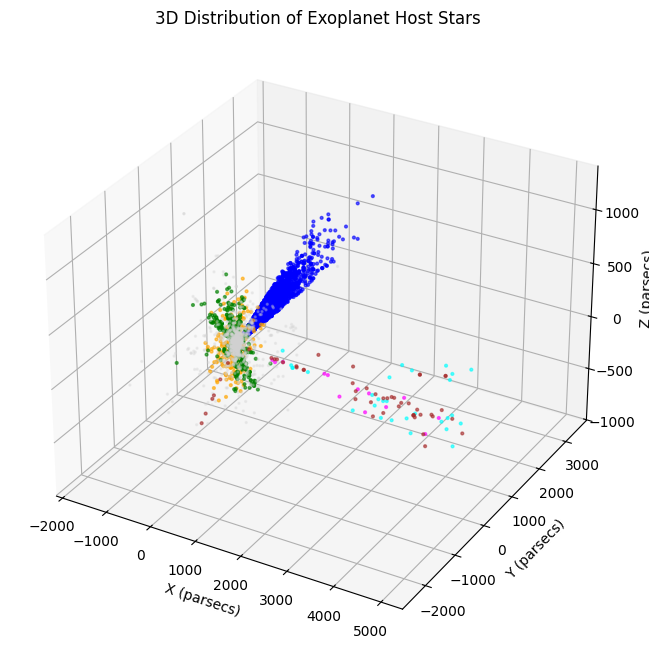

In [31]:
# Create 3d plot
fig = plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111, projection='3d')

ax.scatter(
    x[mask_other],
    y[mask_other],
    z[mask_other],
    s=2,
    alpha=0.3,
    color='lightgray',
    label='Other Facilities'
)

# Loop through key facilities
for facility, color in facility_colors.items():
    mask = planet_gc['disc_facility'] == facility
    if mask.any():  # only plot if present
        ax.scatter(
            x[mask],
            y[mask],
            z[mask],
            s=4,
            alpha=0.6,
            color=color,
            label=facility
        )
ax.scatter(0,0,0, color='red', s=100, label='Sun')
ax.set_xlabel('X (parsecs)')
ax.set_ylabel('Y (parsecs)')
ax.set_zlabel('Z (parsecs)')
ax.set_title('3D Distribution of Exoplanet Host Stars')
plt.show()

In [32]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=x[mask_other],
    y=y[mask_other],
    z=z[mask_other],
    mode='markers',
    marker=dict(size=2, color='black', opacity=0.7),
    name='Other Facilities'
))

# Loop through key facilities
for facility, color in facility_colors.items():
    mask = planet_gc['disc_facility'] == facility
    if mask.any():
        fig.add_trace(go.Scatter3d(
            x=x[mask],
            y=y[mask],
            z=z[mask],
            mode='markers',
            marker=dict(size=3, color=color, opacity=0.7),
            name=facility
        ))

# Earth at origin
fig.add_trace(go.Scatter3d(
    x=[0], y=[0], z=[0],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Earth'
))

fig.update_layout(
    title="3D Galactic Map of Exoplanet Host Systems",
    scene=dict(
        xaxis_title="X (pc)",
        yaxis_title="Y (pc)",
        zaxis_title="Z (pc)",
        aspectmode='data'
    )
)

fig.show()

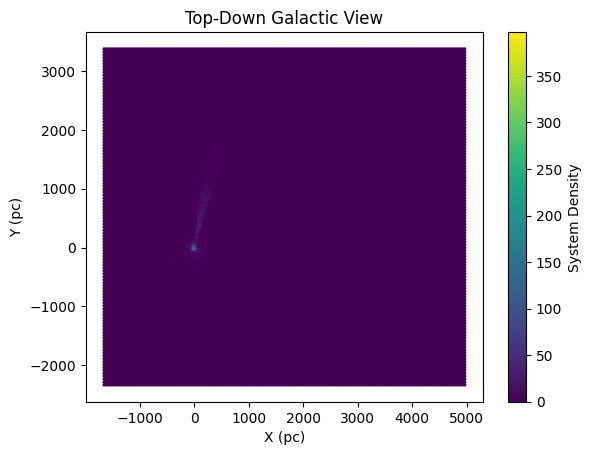

In [33]:
plt.hexbin(x, y, gridsize=200)
plt.xlabel("X (pc)")
plt.ylabel("Y (pc)")
plt.title("Top-Down Galactic View")
plt.colorbar(label="System Density")
plt.show()